# 图像+原始光谱提取

In [2]:
'''
Description: 
Version: 1.0
Author: tangliwen
Date: 2022-08-31 17:57:13
LastEditors: tangliwen
LastEditTime: 2022-10-25 08:43:41
'''
import numpy as np
import cv2 as cv
from  matplotlib import pyplot as plt
import warnings
import spectral
from PIL import Image
warnings.filterwarnings('ignore') #  忽略弹出的warnings信息

# 单个数据的文件夹"F:/pumpkin/2_1_1_emptyname_2023-02-27_02-25-03/capture/"

dataFolderPath = "E:/pumpkin/NO_1/2_1_2_emptyname_2023-02-27_02-26-07/capture/"

# 读取目录下HDR文件
listdata = dataFolderPath.split('/')
f = filter(lambda x:x.find("empty") >= 0,listdata)
l = list(f)
hdrPath = dataFolderPath + l[0] + ".hdr"
rawPath = dataFolderPath + l[0] + ".raw"
hdrHeader = spectral.envi.read_envi_header(hdrPath)

# 根据头文件内容读取初始大小
lines = int(hdrHeader['lines'])
samples = int(hdrHeader['samples'])
bands = int(hdrHeader['bands'])
datatype = hdrHeader['data type']

# 经过周折终于从https://eufat.github.io/2019/02/19/hyperspectral-image-preprocessing-with-python.html发现了正确的读取解决方法
data_ref = spectral.envi.open(dataFolderPath + l[0] + ".hdr", dataFolderPath + l[0] + ".raw")
white_ref = spectral.envi.open(dataFolderPath + "WHITEREF_" + l[0] + ".hdr", dataFolderPath + "WHITEREF_" + l[0] + ".raw")
dark_ref = spectral.envi.open(dataFolderPath + "DARKREF_" + l[0] + ".hdr", dataFolderPath + "DARKREF_" + l[0] + ".raw")

white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

outfile = 'outfile.jpg'


# 图像裁剪
data_nparr = data_nparr[10:600,50:550,:]
dark_nparr = dark_nparr[10:600,50:550,:]
white_nparr = white_nparr[10:600,50:550,:]
# 现在数组大小对不上,除不了
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr)
)

# im = im[10:370,50:580]
# 选择一个波段的图片导出
for i in range(224):
    im = Image.fromarray(corrected_nparr[:,:,i])
    im = im.convert('L')  # 这样才能转为灰度图,如果是彩色图则改L为‘RGB’
    im.save('hyperdata/outcorrdata/outcorrdata_'+ str(i) + '.jpg')
    im2 = Image.fromarray(data_nparr[:,:,i])
    im2 = im2.convert('L')  # 这样才能转为灰度图,如果是彩色图则改L为‘RGB’
    im2.save('hyperdata/outdata/outband_'+ str(i) + '.jpg')
data_nparr.shape    


FileNotFoundError: [Errno 2] No such file or directory: 'E:/pumpkin/NO_1/2_1_2_emptyname_2023-02-27_02-26-07/capture/2_1_2_emptyname_2023-02-27_02-26-07.hdr'

In [ ]:
from asyncio.windows_events import NULL
from turtle import width
import numpy as np
import cv2 as cv
import pandas as pd
import math
# Find the GLCM
import skimage.feature as feature
# 寻找边缘
im = cv.imread('hyperdata/outdata/outband_2.jpg',0)
imgray=im
ret, thresh = cv.threshold(imgray, 150, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# ret, thresh = cv.threshold(imgray, 150, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# # 查找连通域
retval, labels, stats, centroids = cv.connectedComponentsWithStats(thresh, connectivity=8)



# kernel = np.ones((5,5),np.uint8)
# opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# # sure background area
# sure_bg = cv.dilate(opening,kernel,iterations=10)
# # Finding sure foreground area
# dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
# ret, sure_fg = cv.threshold(dist_transform,0.6*dist_transform.max(),255,0)
# # Finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv.subtract(sure_bg,sure_fg)

# # Marker labelling
# ret, markers = cv.connectedComponents(sure_fg)
# # Add one to all labels so that sure background is not 0, but 1
# markers = markers+1
# # Now, mark the region of unknown with zero
# markers[unknown==255] = 0


imgray = cv.imread('hyperdata/outdata/outband_2.jpg',1)
# markers = cv.watershed(imgray,markers)


cv.imwrite("imgray.jpg",imgray)


#导入   #读入原始图像，使用 cv2.IMREAD_UNCHANGEDimg = cv2.imread("girl.jpg", cv2.IMREAD_UNCHANGED)  #查看原始图像shape = img.shapeprint(shape)  #判断通道数是否为 3 或 4 通道if shape[2] == 3 or shape[2] == 4:      #将彩色图转化为三通道图		


In [ ]:
import cv2
im = cv.imread('imgray.jpg',0)
imgray=im
im = cv.imread('hyperdata/outdata/outband_2.jpg',0)
imgray=im

ret, thresh = cv.threshold(imgray, 127, 255, cv.THRESH_OTSU)


# 查找连通域
retval, labels, stats, centroids = cv.connectedComponentsWithStats(thresh, connectivity=8)
for i, stat in enumerate(stats):
    #绘制连通区域
    cv.rectangle(thresh, (stat[0], stat[1]), (stat[0] + stat[2], stat[1] + stat[3]), (255, 0, 0), 1)
    #按照连通区域的索引来打上标签
    cv.putText(thresh, str(i), (stat[0], stat[1] + 25), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

plt.imshow(thresh)

In [ ]:
i

In [ ]:
df = pd.DataFrame()
maxnum=0
countArr = np.zeros(1000)
for x in range(corrected_nparr.shape[0]):
    for y in range(corrected_nparr.shape[1]):
        if labels[x,y] != 0 and corrected_nparr[x,y,:].__contains__(np.Inf) == False:
            if df.columns.__contains__(labels[x,y]):               
                df[labels[x,y]] = df[labels[x,y]] + corrected_nparr[x,y,:]
            else:
                df[labels[x,y]] = corrected_nparr[x,y,:]
            countArr[labels[x,y]] = countArr[labels[x,y]] + 1
for col in df.columns:
    if  countArr[col] > 2000:
        maxnum=col


In [ ]:
maxnum

In [ ]:
stats[3][0] #183
stats[3][1] #51
stats[3][0]+stats[3][2] #436
stats[3][1] + stats[3][3] #509

In [ ]:
#要取出这一个图像来

pumpkin_data=corrected_nparr[stats[3][0]:stats[3][0]+stats[3][2],stats[3][1]:stats[3][1]+stats[3][3],:]

In [ ]:
pumpkin_data.shape

数据预处理

In [ ]:
import numpy as np
import spectral

# 读取高光谱数据
data = spectral.open_image('data.hdr')
# 获取数据维度
n_rows, n_cols, n_bands = data.shape

# 读取南瓜切片位置信息
pumpkin_pos = np.loadtxt('pumpkin_pos.txt')

# 根据南瓜切片位置信息，提取对应位置的数据
pumpkin_data = np.zeros((len(pumpkin_pos), n_bands))
for i, (row, col) in enumerate(pumpkin_pos):
    pumpkin_data[i] =data[row, col, :] 
    

将npy取平均

In [ ]:
import numpy as np
import os
import pandas as pd

folder_path = "datanpy"  # 替换成实际的文件夹路
data_list = []
for filename in os.listdir(folder_path):
    if filename.endswith(".npy"):
        file_path = os.path.join(folder_path, filename)
        data = np.load(file_path)
        avg_data = np.mean(data, axis=(0,1))  # 取平均值得到一维数据
        data_list.append(avg_data)

df = pd.DataFrame(data_list)

In [ ]:
df

In [ ]:
data

# 光谱反演模型建立

npy数据取平均

In [29]:
import os
import numpy as np
import pandas as pd
from signal import signal
import numpy as np
import pandas as pd
import glob
from preprocessSpectral import preprocessSpectral
from  matplotlib import pyplot as plt
import scipy.signal as signal
import sys
import zipfile

def calculate_mean(file_path):
    data = np.load(file_path)
    # print(data.shape)
    mean_data = np.mean(data, axis=0)
    # print(mean_data.shape)
    mean_data = np.mean(mean_data, axis=0)
    # print(mean_data.shape)
    return mean_data

file_dir = 'datanpytest'
mean_list = []
for file_name in os.listdir(file_dir):
    if file_name.endswith('.npy'):
        file_path = os.path.join(file_dir, file_name)
        print(file_path)
        data=np.load(file_path)
        mean_data=data.mean(axis=(0,1))
        mean_list.append(mean_data)

mean_df = pd.DataFrame(mean_list)
# mean_df.to_excel('mean_values.xlsx', index=False)

datanpytest\2_1_1_emptyname_2023-02-27_02-25-03.npy
datanpytest\2_1_2_emptyname_2023-02-27_02-26-07.npy
datanpytest\2_1_3_emptyname_2023-02-27_02-27-12.npy


In [31]:
mean_data

array([ 224.127  ,  224.12816,  259.87775,  319.28284,  396.83572,
        484.26492,  570.9075 ,  644.63806,  703.53595,  750.7759 ,
        784.9676 ,  810.91473,  831.588  ,  847.7674 ,  863.72174,
        876.5717 ,  890.6449 ,  903.9066 ,  916.3555 ,  929.4868 ,
        942.01044,  956.26074,  971.1924 ,  984.24225,  997.9461 ,
       1011.86554, 1026.5488 , 1040.9673 , 1055.6934 , 1071.2311 ,
       1084.7252 , 1098.5973 , 1112.6097 , 1125.4174 , 1137.6216 ,
       1147.5415 , 1156.9579 , 1166.8656 , 1175.5046 , 1185.604  ,
       1191.2216 , 1195.5479 , 1201.7386 , 1204.9259 , 1207.9833 ,
       1210.2626 , 1211.7882 , 1214.1758 , 1210.7922 , 1213.2087 ,
       1211.574  , 1211.2898 , 1208.2839 , 1203.0106 , 1196.3567 ,
       1185.1941 , 1166.3268 , 1141.4276 , 1107.3994 , 1073.8188 ,
       1039.0942 , 1013.05054,  990.42316,  974.7313 ,  965.9377 ,
        957.8914 ,  952.9779 ,  950.8998 ,  944.3716 ,  943.9731 ,
        938.18604,  937.9097 ,  934.20197,  932.7765 ,  931.57

In [25]:
import numpy as np
import os
import pandas as pd

# 定义文件夹路径
folder_path = 'datanpytest'

# 获取文件夹中所有npy文件的路径
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]

# 定义一个空数组用于存储平均值
mean_array = np.zeros((224,))

# 遍历每个npy文件，计算平均值并加入到mean_array中
for file_path in file_paths:
    data = np.load(file_path)
    mean = np.mean(data, axis=(0, 1))
    mean_array += mean

# 计算所有平均值的平均值
# mean_array /= len(file_paths)


In [27]:
mean.shape

(224,)

In [ ]:

# 将平均值导出到excel文件中
df = pd.DataFrame(mean_array)
df.to_excel('mean_values.xlsx', index=False, header=False)

In [ ]:
mean_df

In [ ]:
mean=mean_df.mean()
mean.plot(title='mean')

In [42]:
import pandas as pd
mean_df=pd.read_excel('diyicishuju.xlsx')
mean_df=mean_df.iloc[:,5:205]

In [43]:
mean_df

,5,6,7,8,9,10,11,12,13,14,...,195,196,197,198,199,200,201,202,203,204
0,26.500000,26.080000,25.795000,25.600000,25.495000,25.415000,25.395000,25.390000,25.460000,25.515000,...,9.265000,9.375000,9.475000,9.595000,9.710000,9.830000,9.900000,10.015000,10.085000,10.170000
1,27.840000,27.475000,27.210000,27.035000,26.940000,26.875000,26.860000,26.865000,26.940000,27.000000,...,11.640000,11.765000,11.865000,12.000000,12.140000,12.250000,12.345000,12.475000,12.570000,12.660000
2,24.520000,24.200000,23.946667,23.773333,23.683333,23.606667,23.593333,23.600000,23.656667,23.710000,...,9.123333,9.230000,9.326667,9.433333,9.560000,9.660000,9.750000,9.840000,9.930000,10.010000
3,25.745000,25.350000,25.085000,24.920000,24.800000,24.730000,24.710000,24.705000,24.775000,24.825000,...,10.055000,10.150000,10.255000,10.370000,10.495000,10.615000,10.675000,10.805000,10.875000,10.950000
4,23.536667,23.223333,22.983333,22.833333,22.723333,22.656667,22.623333,22.623333,22.670000,22.723333,...,8.190000,8.276667,8.376667,8.476667,8.593333,8.680000,8.756667,8.860000,8.930000,9.013333
5,23.573333,23.253333,23.010000,22.863333,22.753333,22.686667,22.656667,22.660000,22.716667,22.753333,...,8.233333,8.333333,8.430000,8.523333,8.636667,8.733333,8.803333,8.903333,8.976667,9.060000
6,27.150000,26.940000,26.796667,26.726667,26.670000,26.650000,26.666667,26.683333,26.763333,26.826667,...,11.780000,11.890000,12.016667,12.150000,12.300000,12.440000,12.520000,12.680000,12.756667,12.853333
7,23.596667,23.416667,23.276667,23.203333,23.156667,23.130000,23.126667,23.150000,23.213333,23.260000,...,9.200000,9.296667,9.410000,9.516667,9.636667,9.740000,9.820000,9.923333,10.010000,10.090000
8,24.656667,24.466667,24.323333,24.250000,24.206667,24.176667,24.170000,24.190000,24.260000,24.303333,...,9.560000,9.663333,9.770000,9.883333,10.010000,10.113333,10.200000,10.306667,10.393333,10.486667
9,23.333333,23.113333,22.996667,22.940000,22.920000,22.916667,22.940000,22.976667,23.070000,23.143333,...,7.796667,7.883333,7.980000,8.083333,8.200000,8.303333,8.370000,8.480000,8.553333,8.630000


导入标签

In [35]:
y=pd.read_excel('diyicishuifen.xlsx')
y

,0
0,0.778924
1,0.753581
2,0.755988
3,0.760124
4,0.734996
5,0.767763
6,0.787783
7,0.792223
8,0.785316
9,0.877254


In [44]:
from sklearn.model_selection import train_test_split
train_data_all,test_data_all,train_label_all,test_label_all= train_test_split(mean_df, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(mean_df, y, test_size=0.2)  #在这里设置随机种子

In [45]:
train_label_all

,0
16,0.894654
49,0.927996
45,0.922162
38,0.861100
4,0.734996
43,0.937333
37,0.878854
27,0.854798
2,0.755988
15,0.842391


模型训练和预测

In [46]:
import joblib
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#回归
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

#分类
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVC
from sklearn.svm import NuSVR
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

#回归模型 Ridge Regression,    Lasso Regression ,Logistic Regression,ElasticNet
#
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore') #  忽略弹出的warnings信息

# clf = OneVsOneClassifier(LinearSVC(),n_jobs=-1)
models = [
# PLSRegression(),
#  AdaBoostRegressor(random_state=4848),   #4848的时候有0.54
PLSRegression(n_components=9) 
#  GradientBoostingRegressor(),
#  BaggingRegressor(),
#  ExtraTreeRegressor(),
#  DecisionTreeRegressor(),
#  SVR()
]

#MAE,MSE,
result = pd.DataFrame(columns=['model','explained_variance_score', 'mean_absolute_error', 'mean_squared_error'])
for model in models:
    clf = model
    clf.fit(train_data_all,train_label_all)
    y_pred = clf.predict(test_data_all)
    print(model.__class__)
    joblib.dump(clf, 'hyperdata/outmodels/OVR-models/'+model.__class__.__name__+'.pkl')
        
    result = result.append(pd.Series({
        'model' : model.__class__,
        'explained_variance_score':explained_variance_score(test_label_all,y_pred),
        'mean_absolute_error':mean_absolute_error(test_label_all, y_pred),
        'mean_squared_error':mean_squared_error(test_label_all, y_pred),
        'r2_score':r2_score(test_label_all,y_pred),
        }),ignore_index=True)
result

<class 'sklearn.cross_decomposition._pls.PLSRegression'>


,model,explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
0,<class 'sklearn.cross_decomposition._pls.PLSRe...,0.947688,0.010312,0.000129,0.930617


In [47]:
data = np.load('1_correctednp/2_1_1_emptyname_2023-02-27_02-25-03.npy')
# 获取数据维度
dim1, dim2, dim3 = data.shape
print(f"Data shape: {dim1} x {dim2} x {dim3}")


Data shape: 440 x 272 x 224


In [55]:
data2 = np.load('datanpytest/2_1_1_emptyname_2023-02-27_02-25-03.npy')
# 获取数据维度
dim1, dim2, dim3 = data2.shape
print(f"Data shape: {dim1} x {dim2} x {dim3}")

Data shape: 440 x 272 x 224


In [41]:
value

array([[1.1428572 , 1.1428572 , 1.0909091 , 1.        , 1.0909091 ,
        1.060606  , 1.0243902 , 1.0625    , 1.0535715 , 1.1052631 ,
        1.0153847 , 1.0298507 , 1.0735294 , 1.0714285 , 1.0714285 ,
        1.0410959 , 1.04      , 1.054054  , 1.04      , 1.054054  ,
        1.054054  , 1.08      , 1.0657895 , 1.050633  , 1.0897436 ,
        1.0897436 , 1.1153846 , 1.12      , 1.0609756 , 1.0348837 ,
        1.0617284 , 1.0897436 , 1.0875    , 1.0476191 , 1.0117648 ,
        1.0476191 , 1.0476191 , 1.0476191 , 1.0722891 , 1.0588236 ,
        1.0595238 , 1.045977  , 1.0337079 , 1.0574713 , 1.0561798 ,
        1.0813954 , 1.0561798 , 1.0217391 , 1.0224719 , 0.9775281 ,
        1.021978  , 1.0555556 , 1.043956  , 1.0555556 , 1.0106384 ,
        1.043956  , 1.0434783 , 1.0537634 , 1.0652174 , 1.0543479 ,
        1.0531915 , 1.0666667 , 1.0329671 , 1.0652174 , 1.1011236 ,
        1.1011236 , 1.0104166 , 1.0104166 , 1.0689656 , 1.0666667 ,
        1.0652174 , 1.0543479 , 1.        , 1.  

单个南瓜每个点水分值预测，后面要改就是读取所有npy，然后挨个保存图片

In [193]:
#对于每一个npy,按照第三个维度取出来,对于每一个点,都有一个224的数据,iloc[:,:,1],然后预测,生成的维度和npy前两个数据大小一样的矩阵
import numpy as np
import tensorflow as tf

# 读取npy数据
data = np.load('1_correctednp/2_1_2_emptyname_2023-02-27_02-26-07.npy')
# 获取数据维度
dim1, dim2, dim3 = data.shape
print(f"Data shape: {dim1} x {dim2} x {dim3}")

# 加载已训练好的模型
# model = tf.keras.models.load_model('model.h5')

# 定义预测结果数组
predictions = np.zeros((dim1, dim2))

# 遍历第一、二维度，预测每个value的值
for i in range(dim1):
    for j in range(dim2):
        value = data[i, j, 5:205]
        value = np.expand_dims(value, axis=0)
        # 对value进行预处理，例如归一化等
        # value_processed = preprocess(value)
        # 使用模型预测value的值

        prediction = clf.predict(value)
        # 将预测结果保存到数组中
        predictions[i, j] = prediction

            # 处理value的代码

Data shape: 453 x 247 x 224


In [194]:
value.shape

(1, 200)

In [195]:
predictions

array([[0.95362888, 0.94610793, 0.95321497, ..., 0.97598322, 0.9493873 ,
        0.97192423],
       [0.94399785, 0.95906625, 0.95133431, ..., 0.9390334 , 0.94883097,
        0.9461183 ],
       [0.95788982, 0.9298572 , 0.97084878, ..., 0.95109016, 0.95706531,
        0.99181662],
       ...,
       [0.97950268, 0.97427998, 0.98029648, ..., 0.81578177, 0.85609877,
        0.81278411],
       [0.97303474, 0.99322583, 0.97638622, ..., 0.82360363, 0.85073261,
        0.87360082],
       [0.97608141, 0.92760643, 0.93350185, ..., 0.88294009, 0.89153808,
        0.96358504]])

In [196]:
pr=pd.DataFrame(predictions)
pr

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,0.953629,0.946108,0.953215,0.942706,0.942713,0.931053,0.939897,0.951205,0.949786,0.957078,...,0.955689,0.949790,0.972273,0.963658,0.973509,0.961454,0.969221,0.975983,0.949387,0.971924
1,0.943998,0.959066,0.951334,0.952736,0.945750,0.943082,0.934626,0.952101,0.964959,0.945729,...,0.949306,0.960395,0.967495,0.959908,0.952323,0.960272,0.957850,0.939033,0.948831,0.946118
2,0.957890,0.929857,0.970849,0.966603,0.965446,0.953168,0.947739,0.973023,0.983595,0.973360,...,0.957263,0.954517,0.963384,0.967721,0.963250,0.967453,0.978593,0.951090,0.957065,0.991817
3,0.945833,0.938116,0.965146,0.978674,0.960674,0.935718,0.942835,0.955325,0.951570,0.952538,...,0.932750,0.950446,0.939086,0.936789,0.962559,0.953321,0.952606,0.942606,0.953511,0.941744
4,0.945800,0.952226,0.938385,0.929119,0.979941,0.945555,0.947680,0.961033,0.963751,0.972741,...,0.945085,0.942026,0.955452,0.955166,0.946847,0.959434,0.955249,0.964781,0.966902,0.962048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.932681,0.932256,0.950045,0.969442,0.941619,0.965632,0.959412,0.962415,0.961652,0.950390,...,0.836623,0.792295,0.728599,0.784771,0.784187,0.817783,0.804867,0.756677,0.737986,0.705243
449,0.957523,0.988644,0.953789,0.939831,0.974079,0.940978,0.966942,0.955241,0.962224,0.945448,...,0.792046,0.797970,0.821261,0.796876,0.820188,0.760249,0.739111,0.802896,0.845325,0.813010
450,0.979503,0.974280,0.980296,0.984837,0.966547,0.963931,0.958809,0.972728,0.967063,0.966411,...,0.786116,0.784262,0.818586,0.780973,0.801231,0.799646,0.816606,0.815782,0.856099,0.812784
451,0.973035,0.993226,0.976386,0.943077,0.964517,0.965686,0.968039,0.974523,0.988024,0.962823,...,0.777607,0.797654,0.792592,0.799898,0.830164,0.823924,0.840144,0.823604,0.850733,0.873601


In [197]:
max_values = pr.max()
max=max_values.max()
# 查看DataFrame的最小值
min_values = pr.min()
min= min_values.min()
mean_values=pr.mean()
mean=mean_values.mean()

In [198]:
mean

0.8217055808162202

In [199]:
max

3.7201126392070565

In [200]:
min

-1.6900247266865775

In [156]:
predictions.shape

(440, 272)

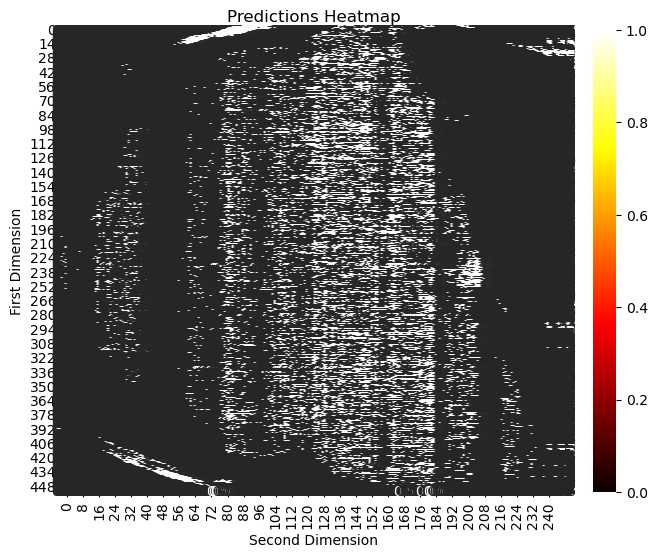

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(predictions, cmap='hot', annot=True, fmt='.2f', cbar=True, vmin=0, vmax=1)
plt.title('Predictions Heatmap')
plt.xlabel('Second Dimension')
plt.ylabel('First Dimension')
plt.show()

热图

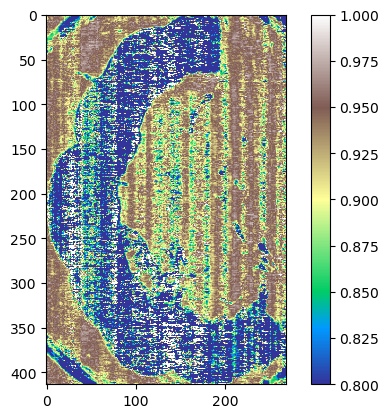

In [171]:
plt.imshow(predictions, cmap='terrain',vmin=0.8, vmax=1)
plt.colorbar()
plt.show()

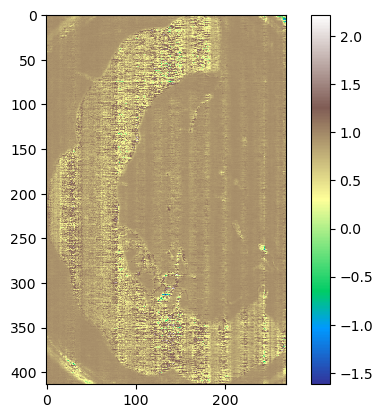

In [168]:
plt.imshow(predictions, cmap='terrain', interpolation='nearest')
plt.colorbar()
plt.show()

结果可视化

# 之前的代码

In [ ]:
'''
Description: 
Version: 1.0
Author: tangliwen
Date: 2022-08-31 17:57:13
LastEditors: tangliwen
LastEditTime: 2022-10-20 14:24:55
'''
import pandas as pd

def calcAvgSpec(nparr):
    countArr = np.zeros(1000)
    # 计算平均光谱
    left = 5
    right = 205
    df = pd.DataFrame()
    for x in range(nparr.shape[0]):
        for y in range(nparr.shape[1]):
            if labels[x,y] != 0 and nparr[x,y,left:right].__contains__(np.Inf) == False:
                if df.columns.__contains__(labels[x,y]):               
                    df[labels[x,y]] = df[labels[x,y]] + nparr[x,y,left:right]
                else:
                    df[labels[x,y]] = nparr[x,y,left:right]
                countArr[labels[x,y]] = countArr[labels[x,y]] + 1

    for col in df.columns:
        if countArr[col] > 2000:
            df[col] = round((df[col]/ countArr[col]).astype('float'),2)
            print(col)
        else:
            df[col] = 0
    return df

df_data = calcAvgSpec(data_nparr)
df_corrdata = calcAvgSpec(corrected_nparr)

In [ ]:
df_corrdata

In [ ]:
df_corrdata.iloc[:,7]

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1)
df_corrdata = selector.fit_transform(df_corrdata)
dftest = pd.DataFrame(df_corrdata)

In [ ]:
dftest

In [ ]:
from sklearn.feature_selection import VarianceThreshold
countArr = np.zeros(1000)
left = 5
right = 205
# 计算平均光谱
df = pd.DataFrame()
for x in range(corrected_nparr.shape[0]):
    for y in range(corrected_nparr.shape[1]):
        if labels[x,y] != 0 and corrected_nparr[x,y,left:right].__contains__(np.Inf) == False:
            if df.columns.__contains__(labels[x,y]):               
                df[labels[x,y]] = df[labels[x,y]] + corrected_nparr[x,y,left:right]
            else:
                df[labels[x,y]] = corrected_nparr[x,y,left:right]
            countArr[labels[x,y]] = countArr[labels[x,y]] + 1
df.shape

In [ ]:

for col in df.columns:
    if countArr[col] < 350 and  countArr[col] > 20:
        df[col] = round((df[col]/ countArr[col]).astype('float'),2)
    else:
        df[col] = 0

# 剔除低方差数据
df.shape

In [ ]:
dftest = pd.DataFrame(df_corrdata)
dftest = pd.DataFrame(np.transpose(dftest))
cols = [x for i, x in enumerate(dftest.columns[0:]) if dftest[x].sum() < 1]
dftest = dftest.drop(cols, axis=1)  # 利用drop方法将含有特定数值的列删除

dftest

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# 剔除低方差数据

# 剔除起始小于20的数据

# selector = VarianceThreshold(threshold=2)
# df_corrdata = selector.fit_transform(df)
dftest = pd.DataFrame(df)
# dftest = dftest.drop(dftest[dftest[0]<20].index)
# dftest = dftest.drop(dftest[dftest[100]>30].index)
dftest = pd.DataFrame(np.transpose(dftest))
plt.clf()
plt.title(l[0])
plt.plot(dftest);
plt.savefig("hyperdata/outresult/" + l[0] + '.jpg')
dftest.shape

In [ ]:
print(np.isnan(dftest).any()[np.isnan(dftest).any() == True])
print(np.isinf(dftest).any()[np.isinf(dftest).any() == True])

In [ ]:
dftest.shape

In [ ]:
# 导出数据
resdf = pd.DataFrame(np.transpose(dftest))
resdf.to_excel("hyperdata/outresult/" + l[0] + '.xlsx')

# 数据处理

In [ ]:
import numpy as np
import cv2 as cv
from  matplotlib import pyplot as plt
from preprocessSpectral import preprocessSpectral

data_process = preprocessSpectral.MA(dftest.to_numpy())
plt.plot(data_process);
data_process.shape

In [ ]:
import numpy as np
import cv2 as cv
from  matplotlib import pyplot as plt
from preprocessSpectral import preprocessSpectral

data_process = preprocessSpectral.SG(dftest.to_numpy(),31,1)
plt.plot(data_process);
data_process.shape

In [ ]:
data_process = preprocessSpectral.MSC(np.transpose(data_process))
plt.plot(np.transpose(data_process));

In [ ]:
data_process = preprocessSpectral.SNV(data_process)
plt.plot(np.transpose(data_process));

In [ ]:
# 导出数据
resdf = pd.DataFrame(data_process)
resdf.to_excel("outfile.xlsx")